# Peer-graded Assignment: Capstone Project - The Battle of Neighborhoods (Week 1)
## Introduction/Business Problem

*The idea of this study is to reflect the reported incidents of crime (with the exception of murders where data exists for each victim) that occurred in the City of Chicago from 2001 to present, minus the most recent seven days. If the data set is viewed it can be concluded that th data set is quite complex to ground zero the information regardng the crimes happening in a specific are or location of Chicago, which are the crimes happening more frequently compared to other ones in a specifc area, where there is a need to increse the number of police commandos,etc.*

## Data

*This dataset reflects reported incidents of crime (with the exception of murders where data exists for each victim) that occurred in the City of Chicago from 2001 to present, minus the most recent seven days. Data is extracted from the Chicago Police Department's CLEAR (Citizen Law Enforcement Analysis and Reporting) system. In order to protect the privacy of crime victims, addresses are shown at the block level only and specific locations are not identified. Should you have questions about this dataset, you may contact the Research & Development Division of the Chicago Police Department at PSITAdministration@ChicagoPolice.org.*

*Disclaimer: These crimes may be based upon preliminary information supplied to the Police Department by the reporting parties that have not been verified. The preliminary crime classifications may be changed at a later date based upon additional investigation and there is always the possibility of mechanical or human error. Therefore, the Chicago Police Department does not guarantee (either expressed or implied) the accuracy, completeness, timeliness, or correct sequencing of the information and the information should not be used for comparison purposes over time. The Chicago Police Department will not be responsible for any error or omission, or for the use of, or the results obtained from the use of this information. All data visualizations on maps should be considered approximate and attempts to derive specific addresses are strictly prohibited. The Chicago Police Department is not responsible for the content of any off-site pages that are referenced by or that reference this web page other than an official City of Chicago or Chicago Police Department web page.* 

*The user specifically acknowledges that the Chicago Police Department is not responsible for any defamatory, offensive, misleading, or illegal conduct of other users, links, or third parties and that the risk of injury from the foregoing rests entirely with the user. The unauthorized use of the words "Chicago Police Department," "Chicago Police," or any colorable imitation of these words or the unauthorized use of the Chicago Police Department logo is unlawful. This web page does not, in any way, authorize such use. Data are updated daily. To access a list of Chicago Police Department - Illinois Uniform Crime Reporting (IUCR) codes, go to http://data.cityofchicago.org/Public-Safety/Chicago-Police-Department-Illinois-Uniform-Crime-R/c7ck-438e*

*To provide the people the necessary information, I'll be combining Chicago Crime Data's 2001 to present data that contains Case Number, ID, Date District,etc.*

## Formal Code with Output
Importing the needed libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors

import seaborn as sns
sns.set_style("darkgrid")

font = {'size'   : 12}
mpl.rc('font', **font)

# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score

def cross_validate(model, n_splits = 10):
    
    k_fold = KFold(n_splits = n_splits)
    scores = [model.fit(X[train], y[train]).score(X[test], y[test]) for train, test in k_fold.split(X)]
    
    scores = np.percentile(scores, [40, 50, 60])
    return scores

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from folium import plugins

# Module to convert an address into latitude and longitude values
from geopy.geocoders import Nominatim 

print('Libraries imported.')

# Get longitude and latitude for Toronto
address = 'Chicago, Chicago'

geolocator = Nominatim(user_agent="chicago")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Rio de Janeiro is {}, {}.'.format(latitude, longitude))

CLIENT_ID = 'IXOZWZIF3TQRA2C20CP4OJP3CZPRBRBBDCPC2AHRN3QVRC2F' # your Foursquare ID
CLIENT_SECRET = 'HT1GCJXEUBRQ53R3QYEX3L5EIHZYGOVDMNMG50CNO2LHYHCU' # your Foursquare Secret
ACCESS_TOKEN = 'C0J1TLXOZWJXE4VNTKAOZBDJ3J4F1FY2YA2TM4L0YIFBTT04' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Libraries imported.
The geograpical coordinate of Rio de Janeiro is 41.8964706, -87.6357194.
Your credentails:
CLIENT_ID: IXOZWZIF3TQRA2C20CP4OJP3CZPRBRBBDCPC2AHRN3QVRC2F
CLIENT_SECRET:HT1GCJXEUBRQ53R3QYEX3L5EIHZYGOVDMNMG50CNO2LHYHCU


Loading the Dataset

In [2]:
csv_path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/FinalModule_Coursera/data/Chicago_Crime_Data-v2.csv'
df = pd.read_csv(csv_path,encoding='latin1')
print('Data loaded')

Data loaded


Size of the database

In [3]:
df.shape

(533, 22)

Details of the database

In [4]:
df.head()

,ID,CASE_NUMBER,DATE,BLOCK,IUCR,PRIMARY_TYPE,DESCRIPTION,LOCATION_DESCRIPTION,ARREST,DOMESTIC,BEAT,DISTRICT,WARD,COMMUNITY_AREA_NUMBER,FBICODE,X_COORDINATE,Y_COORDINATE,YEAR,UPDATEDON,LATITUDE,LONGITUDE,LOCATION
0,3512276,HK587712,08/28/2004 05:50:56 PM,047XX S KEDZIE AVE,890,THEFT,FROM BUILDING,SMALL RETAIL STORE,False,False,911,9,14.0,58.0,6,1155838.0,1873050.0,2004,02/10/2018 03:50:01 PM,41.807441,-87.703956,"(41.8074405, -87.703955849)"
1,3406613,HK456306,06/26/2004 12:40:00 PM,009XX N CENTRAL PARK AVE,820,THEFT,$500 AND UNDER,OTHER,False,False,1112,11,27.0,23.0,6,1152206.0,1906127.0,2004,02/28/2018 03:56:25 PM,41.898280,-87.716406,"(41.898279962, -87.716405505)"
2,8002131,HT233595,04/04/2011 05:45:00 AM,043XX S WABASH AVE,820,THEFT,$500 AND UNDER,NURSING HOME/RETIREMENT HOME,False,False,221,2,3.0,38.0,6,1177436.0,1876313.0,2011,02/10/2018 03:50:01 PM,41.815933,-87.624642,"(41.815933131, -87.624642127)"
3,7903289,HT133522,12/30/2010 04:30:00 PM,083XX S KINGSTON AVE,840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,423,4,7.0,46.0,6,1194622.0,1850125.0,2010,02/10/2018 03:50:01 PM,41.743665,-87.562463,"(41.743665322, -87.562462756)"
4,10402076,HZ138551,02/02/2016 07:30:00 PM,033XX W 66TH ST,820,THEFT,$500 AND UNDER,ALLEY,False,False,831,8,15.0,66.0,6,1155240.0,1860661.0,2016,02/10/2018 03:50:01 PM,41.773455,-87.706480,"(41.773455295, -87.706480471)"


In [5]:
df.tail()

,ID,CASE_NUMBER,DATE,BLOCK,IUCR,PRIMARY_TYPE,DESCRIPTION,LOCATION_DESCRIPTION,ARREST,DOMESTIC,BEAT,DISTRICT,WARD,COMMUNITY_AREA_NUMBER,FBICODE,X_COORDINATE,Y_COORDINATE,YEAR,UPDATEDON,LATITUDE,LONGITUDE,LOCATION
528,10453948,HZ192829,03/01/2016 12:00:00 AM,028XX E 79TH ST,1055,HUMAN TRAFFICKING,INVOLUNTARY SERVITUDE,APARTMENT,False,False,422,4,7.0,46.0,26,1196679.0,1853139.0,2016,02/10/2018 03:50:01 PM,41.751885,-87.554826,"(41.751885152, -87.554825997)"
529,10397129,HZ133234,01/29/2016 03:30:00 PM,006XX W HARRISON ST,5114,NON - CRIMINAL,FOID - REVOCATION,STREET,False,False,124,1,2.0,28.0,26,1172257.0,1897564.0,2016,02/10/2018 03:50:01 PM,41.874363,-87.643013,"(41.874363279, -87.643013039)"
530,3269495,HJ747227,11/08/2003 04:54:15 PM,012XX W 81ST ST,510,RITUALISM,AGG RIT MUT: HANDS/FIST/FEET SERIOUS INJURY,OTHER,False,False,612,6,21.0,71.0,04B,1169648.0,1851076.0,2003,02/28/2018 03:56:25 PM,41.746852,-87.653941,"(41.746852486, -87.653941385)"
531,10840565,JA143710,02/06/2017 01:20:00 PM,009XX N KARLOV AVE,5073,NON-CRIMINAL (SUBJECT SPECIFIED),NOTIFICATION OF CIVIL NO CONTACT ORDER,RESIDENCE,False,True,1111,11,37.0,23.0,26,1148881.0,1905963.0,2017,02/14/2017 03:49:42 PM,41.897895,-87.728622,"(41.89789489, -87.728622316)"
532,1326195,G021609,01/11/2001 02:30:41 AM,087XX S ESCANABA AV,9901,DOMESTIC VIOLENCE,DOMESTIC VIOLENCE,APARTMENT,True,True,423,4,NaN,NaN,08B,1196869.0,1847416.0,2001,08/17/2015 03:03:40 PM,41.736176,-87.554320,"(41.73617608, -87.554319607)"


## Clean up the data and prepare

Now that the data has been imported it needs to be cleaned.

1. Move September 2017 dates to September 2018
2. Clean up the column names:
    A. Strip leading & trailing whitespace
    B. Replace multiple spaces with a single space
    C. Remove # characters
    D. Replace spaces with _
    E. Convert to lowercase
3. Change the date of occurance field to a date / time object
4. Add new columns for:
    A. Hour
    B. Day
    C. Month
    D. Year
    etc.
5. Split Block into zip_code and street
6. Verify that all rows have valid data

In [6]:
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace('\s{2,}', ' ')
df.columns = df.columns.str.replace('#', '')
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.lower()
df.date.replace(to_replace="(09/\\d+)/2017", value=r"\1/2018", regex=True, inplace=True)

In [7]:
df.dtypes

id                         int64
case_number               object
date                      object
block                     object
iucr                      object
primary_type              object
description               object
location_description      object
arrest                      bool
domestic                    bool
beat                       int64
district                   int64
ward                     float64
community_area_number    float64
fbicode                   object
x_coordinate             float64
y_coordinate             float64
year                       int64
updatedon                 object
latitude                 float64
longitude                float64
location                  object
dtype: object

Change the date of occurance field to a date / time object

In [8]:
df['date'] =  pd.to_datetime(df['date'], format='%m/%d/%Y %I:%M:%S %p')

Add new columns for the hour, day, month and year of the crime:

* Hour
* Day Name
* Day of week (Tuesday is the first day)
* Month Name
* Month Number
* Year
* Year and Month

In [9]:
df['hour'] = df['date'].dt.hour
df['day_name'] = df['date'].dt.day_name()
df['day'] = df['date'].dt.dayofweek + 1
df['month_name'] = df['date'].dt.month_name()
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['year_month'] = df['date'].dt.to_period('M')

Split Block into zip_code and street

In [10]:
df['zip'] = df.block.str.split(' ').str[0]
df['street'] = df.block.str.split(' ').str[1:].apply(', '.join)

Verify that all rows have valid data

In [11]:
df.isna().sum()

id                        0
case_number               0
date                      0
block                     0
iucr                      0
primary_type              0
description               0
location_description      0
arrest                    0
domestic                  0
beat                      0
district                  0
ward                     43
community_area_number    43
fbicode                   0
x_coordinate              4
y_coordinate              4
year                      0
updatedon                 0
latitude                  4
longitude                 4
location                  4
hour                      0
day_name                  0
day                       0
month_name                0
month                     0
year_month                0
zip                       0
street                    0
dtype: int64

The data is now ready for visualisation.

In [12]:
df.dropna(inplace=True)
df.reindex()
df.head()

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area_number,fbicode,x_coordinate,y_coordinate,year,updatedon,latitude,longitude,location,hour,day_name,day,month_name,month,year_month,zip,street
0,3512276,HK587712,2004-08-28 17:50:56,047XX S KEDZIE AVE,890,THEFT,FROM BUILDING,SMALL RETAIL STORE,False,False,911,9,14.0,58.0,6,1155838.0,1873050.0,2004,02/10/2018 03:50:01 PM,41.807441,-87.703956,"(41.8074405, -87.703955849)",17,Saturday,6,August,8,2004-08,047XX,"S, KEDZIE, AVE"
1,3406613,HK456306,2004-06-26 12:40:00,009XX N CENTRAL PARK AVE,820,THEFT,$500 AND UNDER,OTHER,False,False,1112,11,27.0,23.0,6,1152206.0,1906127.0,2004,02/28/2018 03:56:25 PM,41.898280,-87.716406,"(41.898279962, -87.716405505)",12,Saturday,6,June,6,2004-06,009XX,"N, CENTRAL, PARK, AVE"
2,8002131,HT233595,2011-04-04 05:45:00,043XX S WABASH AVE,820,THEFT,$500 AND UNDER,NURSING HOME/RETIREMENT HOME,False,False,221,2,3.0,38.0,6,1177436.0,1876313.0,2011,02/10/2018 03:50:01 PM,41.815933,-87.624642,"(41.815933131, -87.624642127)",5,Monday,1,April,4,2011-04,043XX,"S, WABASH, AVE"
3,7903289,HT133522,2010-12-30 16:30:00,083XX S KINGSTON AVE,840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,423,4,7.0,46.0,6,1194622.0,1850125.0,2010,02/10/2018 03:50:01 PM,41.743665,-87.562463,"(41.743665322, -87.562462756)",16,Thursday,4,December,12,2010-12,083XX,"S, KINGSTON, AVE"
4,10402076,HZ138551,2016-02-02 19:30:00,033XX W 66TH ST,820,THEFT,$500 AND UNDER,ALLEY,False,False,831,8,15.0,66.0,6,1155240.0,1860661.0,2016,02/10/2018 03:50:01 PM,41.773455,-87.706480,"(41.773455295, -87.706480471)",19,Tuesday,2,February,2,2016-02,033XX,"W, 66TH, ST"


## Data Visualisation
To get a better understanding of the data we will now visualise it.
### Number of Crimes per Year

Text(0.0, 1.0, 'Number of Cases Per Year')

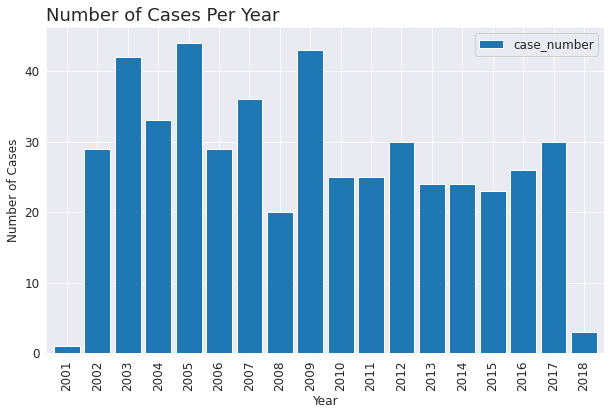

In [13]:
df.groupby('year').count().plot(y = 'case_number', 
                                      kind='bar',
                                      figsize=(10,6),
                                      width=0.85,
                                      fontsize=12,
                                      colormap='tab20').legend(bbox_to_anchor=(1,1),
                                                               prop={'size': 12})

plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.title('Number of Cases Per Year', loc='left', fontsize=18)

Unsuprisingly there little obvious variation in the number of crimes committed per month other than an apparent drop-off in February.
## Number of crimes occuring on each day

Text(0.0, 1.0, 'Count of Cases Per Day of Week [1 is a Monday]')

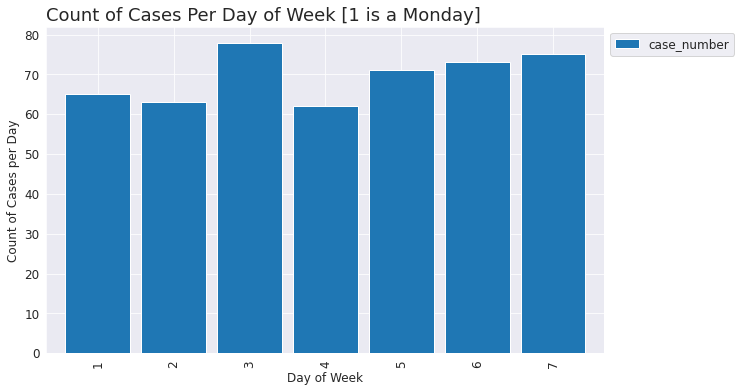

In [14]:
df.groupby('day').count().plot(y = 'case_number',
                               kind='bar',
                               figsize=(10,6),
                               width=0.85,
                               fontsize=12,
                               colormap='tab20').legend(bbox_to_anchor=(1,1),
                                                        prop={'size': 12})

plt.xlabel('Day of Week')
plt.ylabel('Count of Cases per Day')
plt.title('Count of Cases Per Day of Week [1 is a Monday]', loc='left', fontsize=18)

There is a small increase in crime reported at the weekend, Saturday and Sunday, but nothing that couldbe considered significant.
## Number of crimes occuring in each hour

Text(0.0, 1.0, 'Count of Cases Per Hour]')

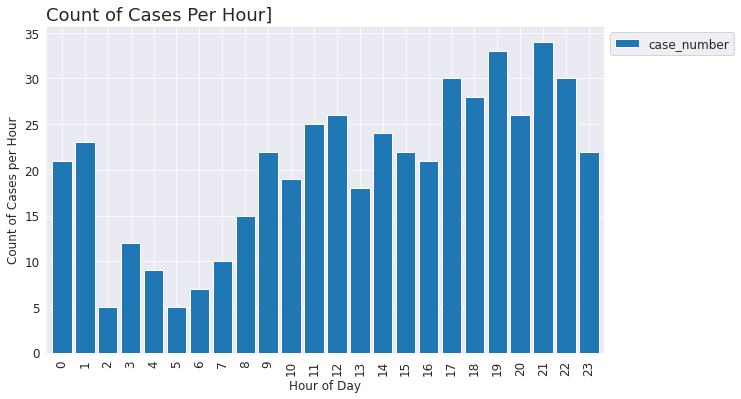

In [15]:
df.groupby('hour').count().plot(y = 'case_number',
                               kind='bar',
                               figsize=(10,6),
                               width=0.85,
                               fontsize=12,
                               colormap='tab20').legend(bbox_to_anchor=(1,1),
                                                        prop={'size': 12})

plt.xlabel('Hour of Day')
plt.ylabel('Count of Cases per Hour')
plt.title('Count of Cases Per Hour]', loc='left', fontsize=18)

There is an expected fall-off in reported crime rates after midnight before elevating again after eight in the morning.

Now let's look at the Crime Categories.

In [16]:
# Number of unique Crime categories bases on the Primary Description
df.primary_type.nunique()

34

In [17]:
# What Crimes are the 3 most commonly occuring ones 
df[['primary_type', 'case_number']].groupby(
    ['primary_type'], as_index=False).count().sort_values(
    'case_number', ascending=False).head(3)

,primary_type,case_number
32,THEFT,100
2,BATTERY,81
6,CRIMINAL DAMAGE,55


In [18]:
# Create a list of the 10 most commonly occuring crimes
top_crimes = df[['primary_type', 'case_number']].groupby(
    ['primary_type']).count().sort_values('case_number', ascending=False)[:10].axes[0].tolist()

# Create a list of the 3 most commonly occuring crimes
top_three_crimes = df[['primary_type', 'case_number']].groupby(
    ['primary_type']).count().sort_values('case_number', ascending=False)[:3].axes[0].tolist()

# Create a list of the 2 most commonly occuring crimes
top_two_crimes = df[['primary_type', 'case_number']].groupby(
    ['primary_type']).count().sort_values('case_number', ascending=False)[:2].axes[0].tolist()

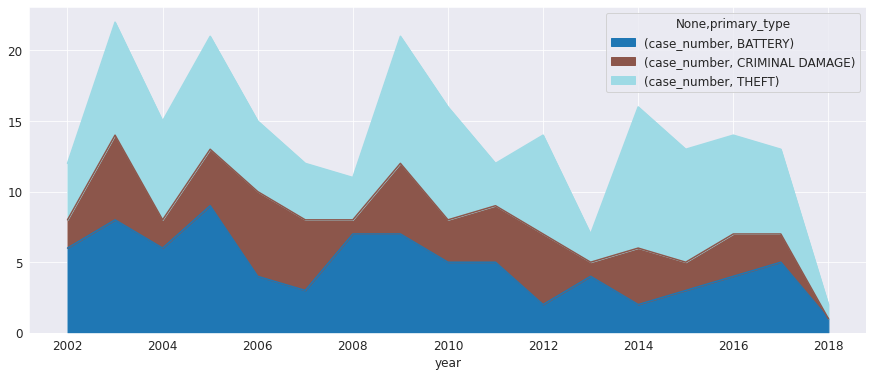

In [19]:
# Create a new data frame with just the top 10 crimes
df_top_crimes = df[df['primary_type'].isin(top_crimes)].copy()

# Create a new data frame with just the top 10 crimes
df_top3_crimes = df[df['primary_type'].isin(top_three_crimes)].copy()

df_top3_crimes[['case_number', 'primary_type', 'year']].pivot_table(
    index='year', 
    columns='primary_type', 
    fill_value=0, 
    aggfunc='count').plot(kind='area',
                          stacked=True,
                          figsize=(15, 6),
                               fontsize=12,
                               colormap='tab20')

Text(0.0, 1.0, 'Count of Cases Per Hour]')

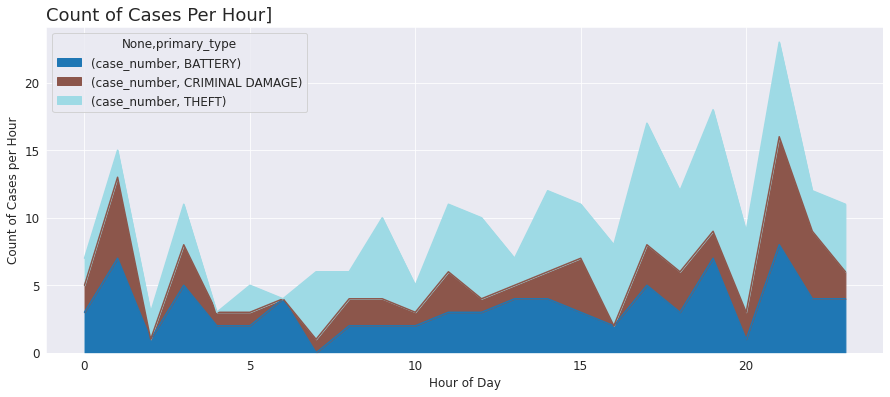

In [20]:
df_top3_crimes[['case_number', 'primary_type', 'hour']].pivot_table(
    index='hour', 
    columns='primary_type', 
    fill_value=0, 
    aggfunc='count').plot(kind='area',
                          stacked=True,
                          figsize=(15, 6),
                               fontsize=12,
                               colormap='tab20')

plt.xlabel('Hour of Day')
plt.ylabel('Count of Cases per Hour')
plt.title('Count of Cases Per Hour]', loc='left', fontsize=18)

### Visual Crimes on map of Chicago

In [21]:
df_top_crimes.dtypes

id                                int64
case_number                      object
date                     datetime64[ns]
block                            object
iucr                             object
primary_type                     object
description                      object
location_description             object
arrest                             bool
domestic                           bool
beat                              int64
district                          int64
ward                            float64
community_area_number           float64
fbicode                          object
x_coordinate                    float64
y_coordinate                    float64
year                              int64
updatedon                        object
latitude                        float64
longitude                       float64
location                         object
hour                              int64
day_name                         object
day                               int64


### Create a folium map with a different colour per crime
Colour each of the top 10 crimes with a different and plot on a Folium map.

In [22]:
# Create a list of colours. 
# We have  list of the top 10 crimes from earlier
colors = [
    'red',
    'blue',
    'gray',
    'orange',
    'beige',
    'green',
    'purple',
    'pink',
    'cadetblue',
    'black'
]

# Create a dictionary of colours to map to the crimes
dict_colours = dict(zip(top_crimes, colors))

# Add the colours colums to the df_top_crimes DataFrame
df_top_crimes['colour'] = df_top_crimes.primary_type.map(dict_colours)

The entire df_top_crimes DataFrame contains too many point to disply effeciently using Folium. To combat this we will just use the data from August.

In [23]:
df_top_crimes_august = df_top_crimes[df_top_crimes.month_name == 'August']

# Pickle the DataFrame to Separate the Folium Maps into a Separate Notepad
df_top_crimes_august.to_pickle('crimes_august.pkl')

In [24]:
chicago_latitude = 41.85  
chicago_longitude = -87.75
mc = MarkerCluster()

# Define the world map centered around Chicago with a higher zoom level
chicago_cluster = folium.Map(location=[chicago_latitude, chicago_longitude], zoom_start=11)

# display world map
chicago_cluster

#creating a Marker for each point in df_sample. Each point will get a popup with their zip
for row in df_top_crimes_august.itertuples():
    mc.add_child(folium.Marker(
        location=[row.latitude,  row.longitude],
                 popup=row.primary_type))

chicago_cluster.add_child(mc)
chicago_cluster

In [25]:

from folium import plugins
from folium.plugins import HeatMap

chicago_heatmat = folium.Map(location=[chicago_latitude, chicago_longitude], zoom_start=11) 

# List comprehension to make out list of lists
heat_data = [[row['latitude'], 
              row['longitude']] for index, row in df_top_crimes_august.iterrows()]

# Plot it on the map
HeatMap(heat_data,
        min_opacity=0.5,
        max_zoom=18, 
        max_val=1.0, 
        radius=15,
        blur=20,
        gradient=None,
        overlay=True).add_to(chicago_heatmat)

# Display the map
chicago_heatmat

In [26]:
df_top_crimes.dtypes

id                                int64
case_number                      object
date                     datetime64[ns]
block                            object
iucr                             object
primary_type                     object
description                      object
location_description             object
arrest                             bool
domestic                           bool
beat                              int64
district                          int64
ward                            float64
community_area_number           float64
fbicode                          object
x_coordinate                    float64
y_coordinate                    float64
year                              int64
updatedon                        object
latitude                        float64
longitude                       float64
location                         object
hour                              int64
day_name                         object
day                               int64


# Data Preparation for Modelling
Before we start modelling we need to prepare the data frame to include only mumerical data and by removing unneeded columns.

Rather than removing colums from df_top_crimes a new df_features DataFrame will be created with just the required columns. This df_features DataFrame will then be processed to remove Categorical Data Types and replace them with One Hot encoding. Finally the Dependant Variables will be Normalised and Principal Component Analysis will be used to reduce the dimensionality of the DataFrame.

In [27]:
# Start by copying the Latitude and Longitude to the new DataFrame
df_features = df_top_crimes[['latitude', 'longitude']]

# Next and One Hot Encoding of the hour, day and month variables
df_features = df_features.join(pd.get_dummies(df_top_crimes.hour, prefix='hour'))
df_features = df_features.join(pd.get_dummies(df_top_crimes.day_name))
df_features = df_features.join(pd.get_dummies(df_top_crimes.month_name))

# Finally add the ward & crimes column, copied from the original Primary Description column
df_features['ward'] = df_top_crimes[['ward']]
df_features['crimes'] = df_top_crimes[['primary_type']]

In [28]:
df_features.head()

,latitude,longitude,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,April,August,December,February,January,July,June,March,May,November,October,September,ward,crimes
0,41.807441,-87.703956,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,14.0,THEFT
1,41.898280,-87.716406,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,27.0,THEFT
2,41.815933,-87.624642,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3.0,THEFT
3,41.743665,-87.562463,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,7.0,THEFT
4,41.773455,-87.706480,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,15.0,THEFT


There are a couple of further small changes to be made:

* Create a smaller DataFrame of only the top three crimes
* Create the X, dependant variables, DataFrames by dropping the Crimes column
* Create the y, independant variable,
* Normailse the X Data

In [29]:
# Create a smaller DataFrame of only the top three crimes
df_features_3 = df_features[df_features['crimes'].isin(top_three_crimes)].copy()

# Create a smaller DataFrame of only the top two crimes
df_features_2 = df_features[df_features['crimes'].isin(top_two_crimes)].copy()

In [30]:
#  Create the X, dependant variables, DataFrames by dropping the Crimes column
X_10 = df_features.copy()
y_10 = X_10.crimes.values

X_10.drop('crimes', axis=1, inplace=True)
X_10 = preprocessing.StandardScaler().fit(X_10).transform(X_10)


X_3 = df_features_3.copy()
y_3 = X_3.crimes.values

X_3.drop('crimes', axis=1, inplace=True)
X_3 = preprocessing.StandardScaler().fit(X_3).transform(X_3)

X_2 = df_features_2.copy()
y_2 = X_2.crimes.values

X_2.drop('crimes', axis=1, inplace=True)
X_2 = preprocessing.StandardScaler().fit(X_2).transform(X_2)

In [31]:
# Set X = X_10
X = X_10
y = y_10

In [32]:
# Set X = X_3
X = X_3
y = y_3

In [33]:
# Set X = X_2
X = X_2
y = y_2

## K Nearest Neighbor(KNN)
Find the best k to build the model with the best accuracy.

Depth:  10   2020-12-30 16:36:37.419643
Depth:  11   2020-12-30 16:36:37.450622
Depth:  12   2020-12-30 16:36:37.472522
Depth:  13   2020-12-30 16:36:37.494644
Depth:  14   2020-12-30 16:36:37.517490
Depth:  15   2020-12-30 16:36:37.542563


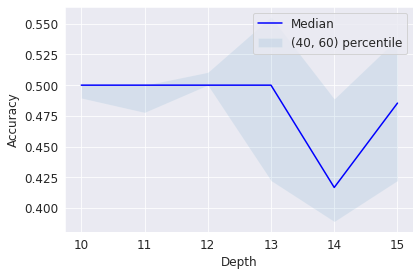

In [34]:
# Decision Tree
from datetime import datetime
from sklearn.tree import DecisionTreeClassifier

depths = range(10, 16)
scores = np.zeros((len(depths), 3))
# scores = np.zeros((len(depths), 2))
for idx, depth in enumerate(depths):
    print('Depth: ', depth, ' ', str(datetime.now()))
    model = DecisionTreeClassifier(criterion = "entropy", max_depth = depth)
    scores[idx, : ] = cross_validate(model, n_splits = 10)

plt.plot(depths, scores[ : , 1], 'b')
plt.fill_between(depths, scores[ : , 0], scores[:, 2], alpha = 0.1)
plt.legend(('Median', '(40, 60) percentile'))
plt.ylabel('Accuracy')
plt.xlabel('Depth')
plt.tight_layout()
plt.show()

C:  0.01   2020-12-30 16:36:37.969707
C:  0.03162277660168379   2020-12-30 16:36:37.984817
C:  0.1   2020-12-30 16:36:37.999334
C:  0.31622776601683794   2020-12-30 16:36:38.014997
C:  1.0   2020-12-30 16:36:38.031859
C:  3.1622776601683795   2020-12-30 16:36:38.050915


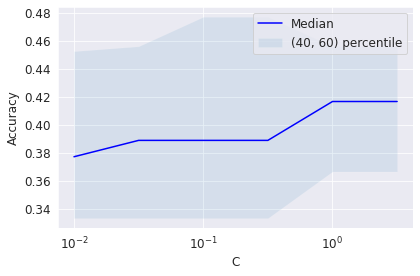

In [35]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

C = np.logspace(-2.0, 0.5, num = 6, endpoint = True)
scores = np.zeros((len(C), 3))
for idx, c in enumerate(C):
    print('C: ', c, ' ', str(datetime.now()))
    model = LogisticRegression(C = c, solver = 'liblinear')
    scores[idx, : ] = cross_validate(model, n_splits = 10)

plt.plot(C, scores[ : , 1], 'b')
plt.xscale('log')
plt.fill_between(C, scores[ : , 0], scores[:, 2], alpha = 0.1)
plt.legend(('Median', '(40, 60) percentile'))
plt.ylabel('Accuracy')
plt.xlabel('C')
plt.tight_layout()
plt.show()

Alpha:  0.1   2020-12-30 16:36:41.378936
Alpha:  0.2   2020-12-30 16:36:41.407531
Alpha:  0.30000000000000004   2020-12-30 16:36:41.426096
Alpha:  0.4   2020-12-30 16:36:41.445105
Alpha:  0.5   2020-12-30 16:36:41.464930
Alpha:  0.6   2020-12-30 16:36:41.483938
Alpha:  0.7000000000000001   2020-12-30 16:36:41.502706
Alpha:  0.8   2020-12-30 16:36:41.522593
Alpha:  0.9   2020-12-30 16:36:41.545398
Alpha:  1.0   2020-12-30 16:36:41.564159


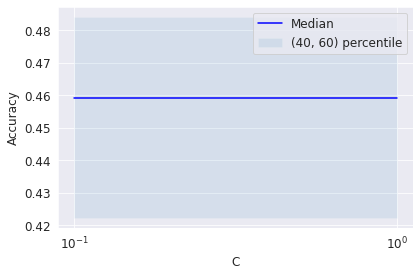

In [36]:
# Naive Bayes

alpha = np.linspace(0.1, 1, num=10)
scores = np.zeros((len(alpha), 3))
for idx, a in enumerate(alpha):
    print('Alpha: ', a, ' ', str(datetime.now()))
    model = BernoulliNB()
    scores[idx, : ] = cross_validate(model, n_splits = 10)

plt.plot(alpha, scores[ : , 1], 'b')
plt.xscale('log')
plt.fill_between(alpha, scores[ : , 0], scores[:, 2], alpha = 0.1)
plt.legend(('Median', '(40, 60) percentile'))
plt.ylabel('Accuracy')
plt.xlabel('C')
plt.tight_layout()
plt.show()

Estimator:  12   2020-12-30 16:36:43.119029
Estimator:  13   2020-12-30 16:36:43.353692
Estimator:  14   2020-12-30 16:36:43.594878
Estimator:  15   2020-12-30 16:36:43.854524
Estimator:  16   2020-12-30 16:36:44.131086
Estimator:  17   2020-12-30 16:36:44.426268


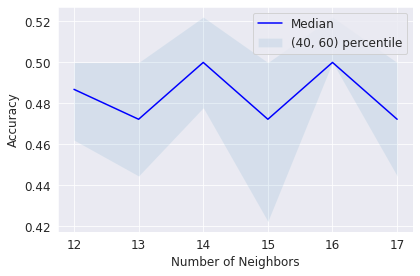

In [37]:
# Decision Forest using a Random Forest

est = range(12, 18)
scores = np.zeros((len(est), 3))
for idx, a in enumerate(est):
    print('Estimator: ', a, ' ', str(datetime.now()))
    model = RandomForestClassifier(n_estimators = a, max_features = 'sqrt')
    scores[idx, : ] = cross_validate(model, n_splits = 10)

plt.plot(est, scores[ : , 1], 'b')
plt.fill_between(est, scores[ : , 0], scores[:, 2], alpha = 0.1)
plt.legend(('Median', '(40, 60) percentile'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.tight_layout()
plt.show()